In [83]:
import numpy as np
import keras
from keras.datasets import cifar10
from keras import layers, models
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Data loading

In [54]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# EDA

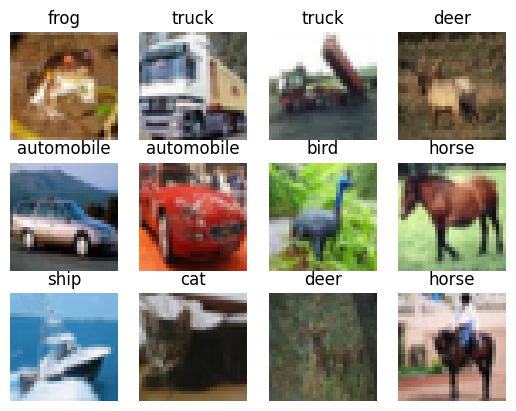

In [62]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig = plt.figure(0)
for i in range(12):
    fig.add_subplot(3, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(class_names[y_train[i,0]])
plt.show()

In [56]:
x_train.mean(axis=0).shape

(32, 32, 3)

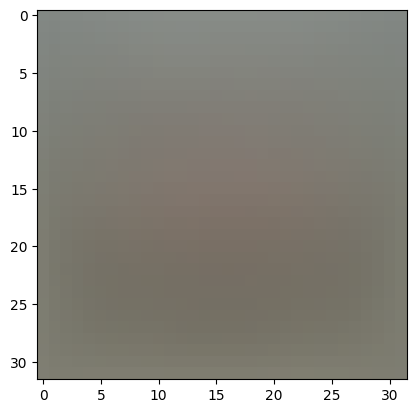

In [57]:
plt.imshow(x_train.mean(axis=0))

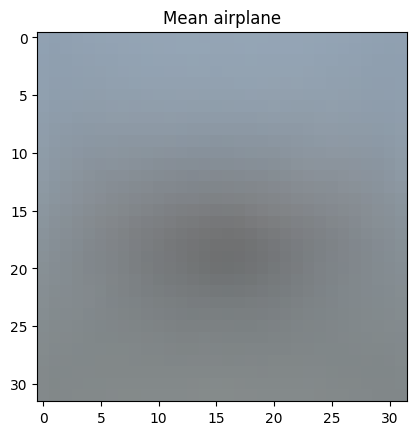

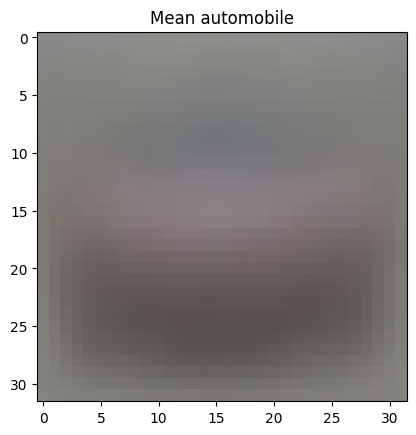

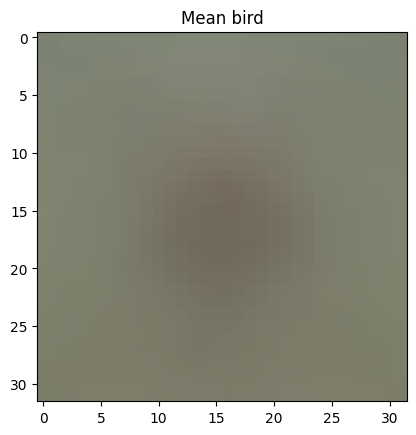

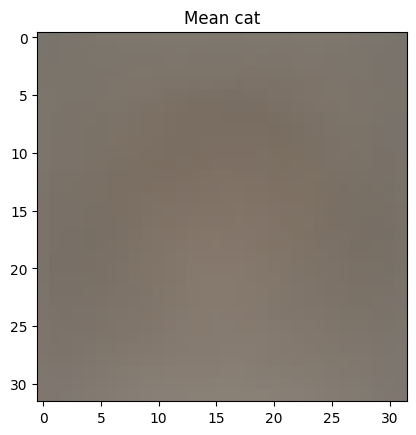

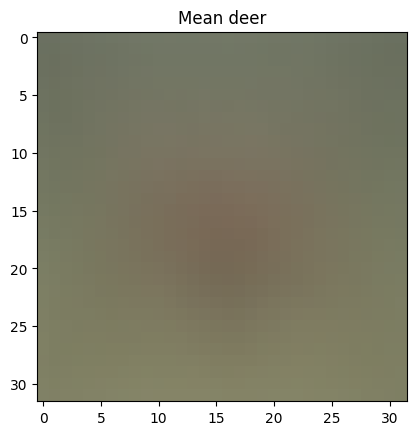

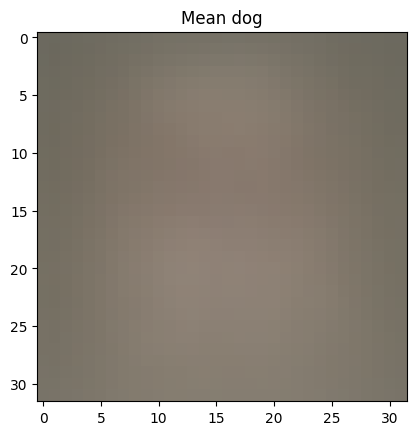

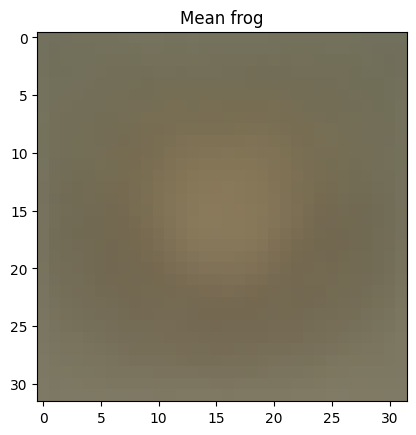

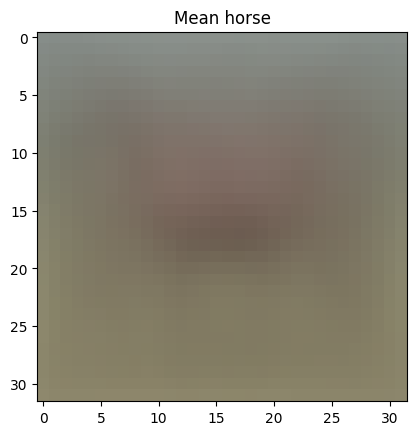

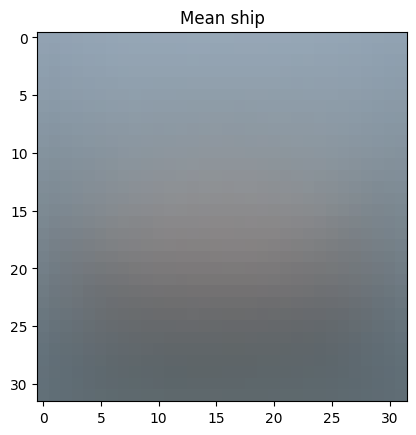

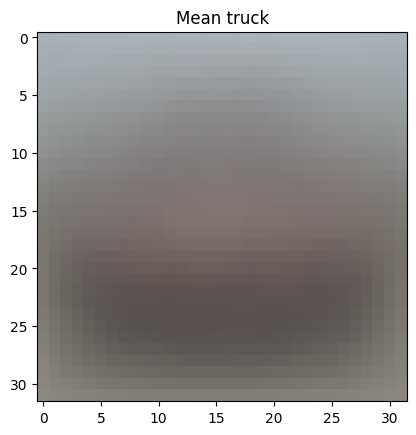

In [63]:
for i in np.unique(y_train):
    plt.imshow(x_train[(y_train==i).flatten(),:,:].mean(axis=0))
    plt.title(f'Mean {class_names[i]}')
    plt.show()

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


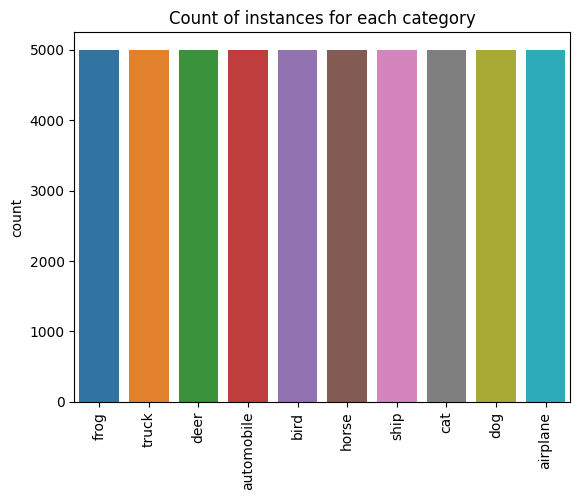

In [74]:
sns.countplot(x=list(map(lambda x: class_names[x], y_train.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


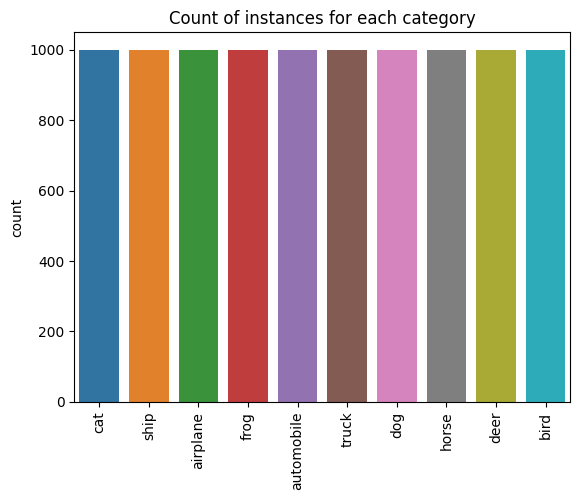

In [75]:
sns.countplot(x=list(map(lambda x: class_names[x], y_test.flatten())))
plt.xticks(rotation=90)
plt.title('Count of instances for each category')
plt.show()

# CNN

## First model

In [84]:
cnn = models.Sequential()
cnn.add(layers.Conv2D(24, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(10))

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [85]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 24)     │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        54,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 54,682 (213.60 KB)

 Trainable params: 54,682 (213.60 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
cnn.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [87]:
history_cnn = cnn.fit(x_train, y_train,
                     epochs=10, batch_size=32,
                     validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3967 - loss: 1.7108 - val_accuracy: 0.5258 - val_loss: 1.3612
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5559 - loss: 1.2704 - val_accuracy: 0.5862 - val_loss: 1.2201
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6029 - loss: 1.1514 - val_accuracy: 0.5862 - val_loss: 1.1903
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6263 - loss: 1.0823 - val_accuracy: 0.6146 - val_loss: 1.1277
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6411 - loss: 1.0357 - val_accuracy: 0.6192 - val_loss: 1.1134
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6633 - loss: 0.9860 - val_accuracy: 0.6280 - val_loss: 1.1003
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6640 - loss: 0.9683 - val_accuracy: 0.6402 - val_loss: 1.0794
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6811 - loss: 0.9319 -

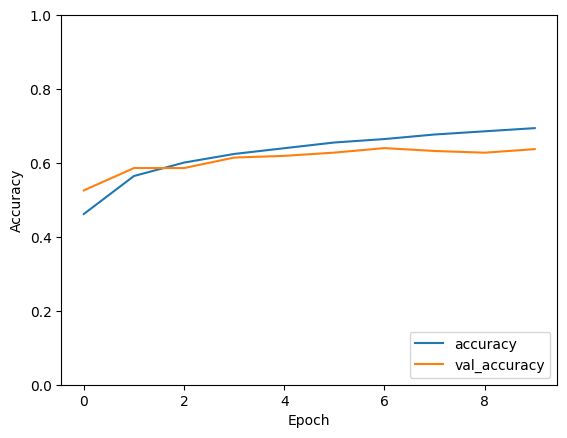

In [88]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

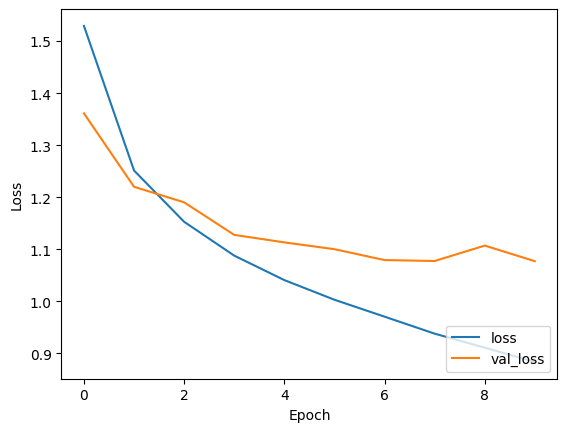

In [91]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn.history['loss'], label='loss')
plt.plot(history_cnn.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

In [92]:
# loss function and accuracy on test set for model [cnn]
test_loss_cnn, test_acc_cnn = cnn.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 3ms/step - accuracy: 0.6266 - loss: 1.0991


In [93]:
test_loss_cnn

1.0990933179855347

In [94]:
test_acc_cnn

0.6266000270843506

## Second model

In [96]:
cnn2 = models.Sequential()
cnn2.add(layers.Conv2D(36, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn2.add(layers.MaxPooling2D((3, 3)))
cnn2.add(layers.Conv2D(24, (3, 3), activation='sigmoid'))
cnn2.add(layers.MaxPooling2D((2, 2)))
cnn2.add(layers.Flatten())
cnn2.add(layers.Dense(10))

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [97]:
cnn2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 36)     │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 36)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 24)       │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 24)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         3,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,658 (49.45 KB)

 Trainable params: 12,658 (49.45 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
cnn2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
history_cnn2 = cnn2.fit(x_train, y_train,
                     epochs=10, batch_size=32,
                     validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2608 - loss: 2.0038 - val_accuracy: 0.4394 - val_loss: 1.5438
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4703 - loss: 1.4760 - val_accuracy: 0.5196 - val_loss: 1.3507
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5281 - loss: 1.3397 - val_accuracy: 0.5498 - val_loss: 1.2796
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5592 - loss: 1.2494 - val_accuracy: 0.5814 - val_loss: 1.2122
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5810 - loss: 1.1917 - val_accuracy: 0.5930 - val_loss: 1.1658
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5987 - loss: 1.1431 - val_accuracy: 0.6022 - val_loss: 1.1303
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6135 - loss: 1.1002 - val_accuracy: 0.6216 - val_loss: 1.0854
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6322 - loss: 1.0

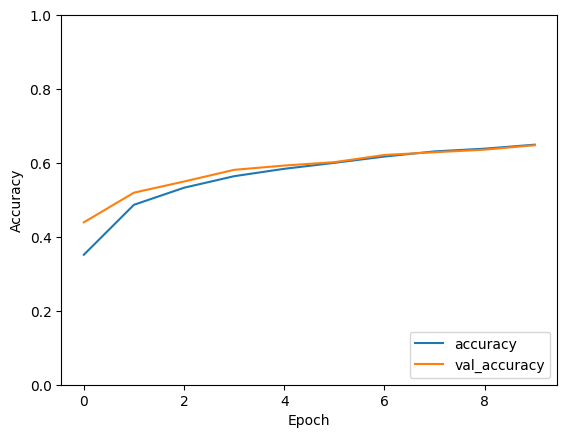

In [100]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn2.history['accuracy'], label='accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

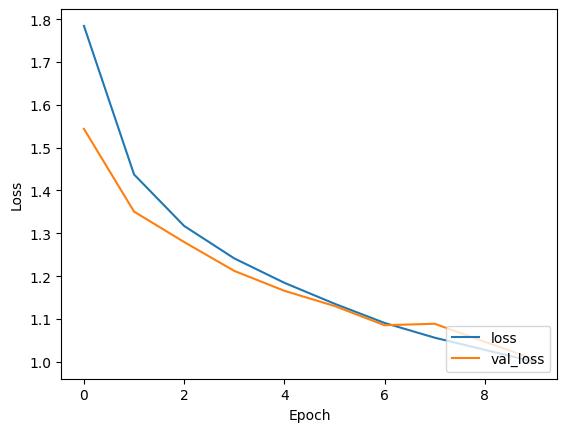

In [101]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn2.history['loss'], label='loss')
plt.plot(history_cnn2.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

## Third model

In [104]:
cnn3 = models.Sequential()
cnn3.add(layers.Conv2D(36, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn3.add(layers.Conv2D(24, (3, 3), activation='sigmoid'))
cnn3.add(layers.MaxPooling2D((2, 2)))
cnn3.add(layers.Flatten())
cnn3.add(layers.Dense(10))

c:\Users\mazur\anaconda\envs\python11\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [106]:
cnn3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 36)     │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 24)     │         7,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 24)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 4704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │        47,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,858 (218.20 KB)

 Trainable params: 55,858 (218.20 KB)

 Non-trainable params: 0 (0.00 B)

In [107]:
cnn3.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
history_cnn3 = cnn3.fit(x_train, y_train,
                     epochs=10, batch_size=32,
                     validation_split=0.1)

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.2838 - loss: 2.0153 - val_accuracy: 0.4374 - val_loss: 1.5550
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 29s 21ms/step - accuracy: 0.4810 - loss: 1.4554 - val_accuracy: 0.5562 - val_loss: 1.2825
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.5680 - loss: 1.2286 - val_accuracy: 0.5844 - val_loss: 1.1958
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6095 - loss: 1.1118 - val_accuracy: 0.5866 - val_loss: 1.1809
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.6307 - loss: 1.0450 - val_accuracy: 0.6068 - val_loss: 1.1363
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.6579 - loss: 0.9723 - val_accuracy: 0.6306 - val_loss: 1.0913
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 57s 41ms/step - accuracy: 0.6813 - loss: 0.9116 - val_accuracy: 0.6344 - val_loss: 1.0766
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.6968 -

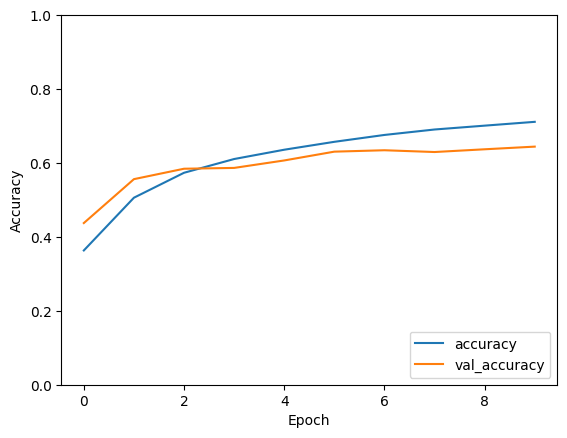

In [109]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn3.history['accuracy'], label='accuracy')
plt.plot(history_cnn3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

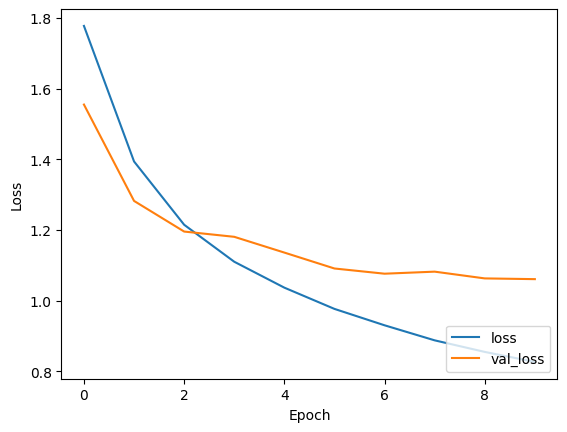

In [110]:
# Plot of learning curves for model [cnn]
plt.plot(history_cnn3.history['loss'], label='loss')
plt.plot(history_cnn3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')